In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.style.use("ggplot")


In [2]:
df = pd.read_csv("heart.csv")
print("Patient Records Loaded:", df.shape[0])
print("Medical Attributes:", df.shape[1] - 1)  
df.head()


Patient Records Loaded: 1025
Medical Attributes: 13


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Checking for missing values...
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Diagnosing dataset balance:


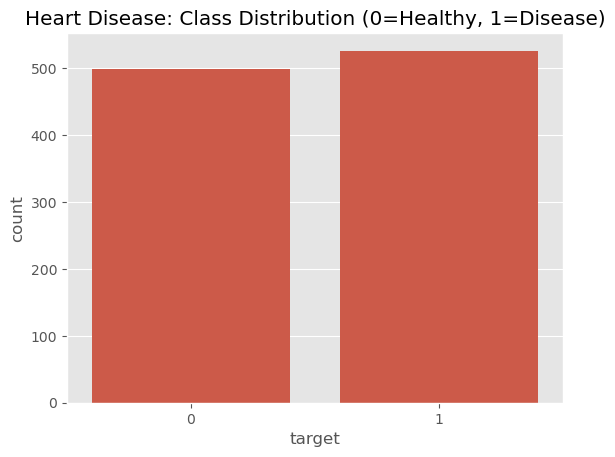

In [3]:
print("Checking for missing values...")
print(df.isnull().sum())

print("\n Diagnosing dataset balance:")
sns.countplot(x=df["target"])
plt.title("Heart Disease: Class Distribution (0=Healthy, 1=Disease)")
plt.show()


In [4]:
X = df.drop(columns=["target"])
y = df["target"]

X.shape, y.shape


((1025, 13), (1025,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [6]:
dt = DecisionTreeClassifier(
    max_depth=None, 
    random_state=42
)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366


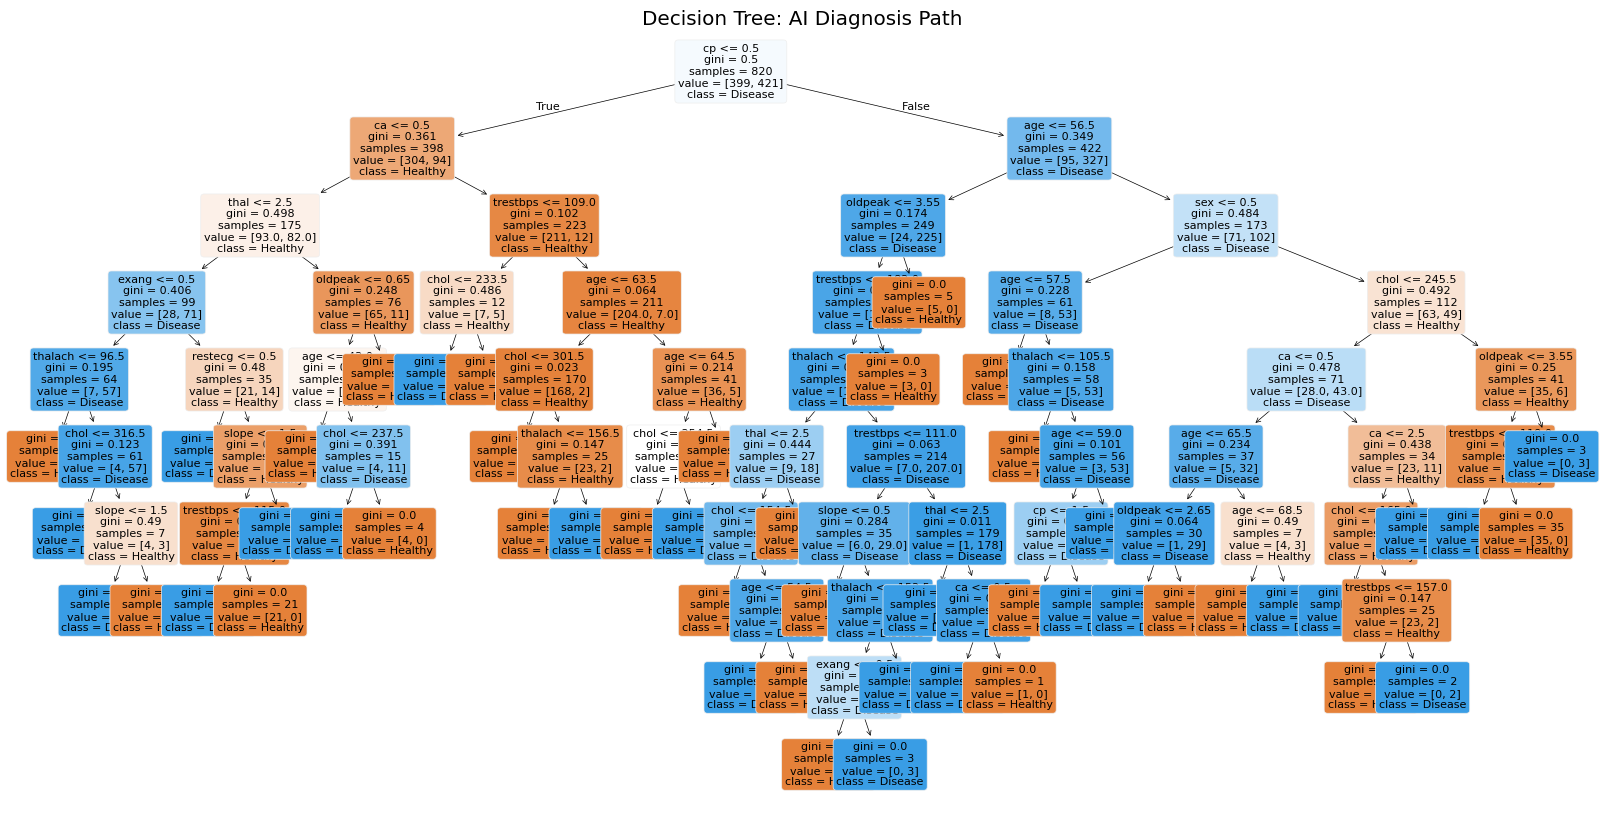

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt, 
    filled=True,
    feature_names=X.columns,
    class_names=["Healthy","Disease"],
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree: AI Diagnosis Path")
plt.show()


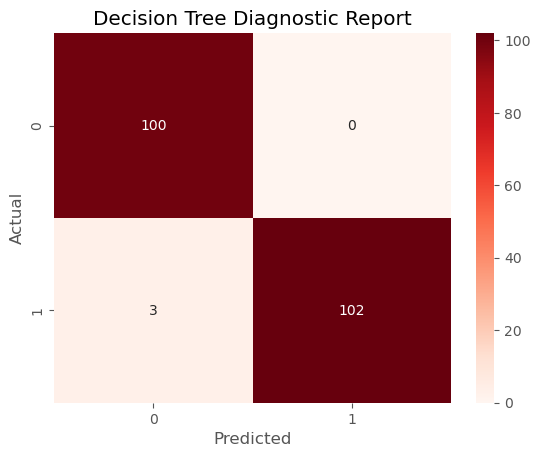

In [10]:
cm = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Decision Tree Diagnostic Report")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


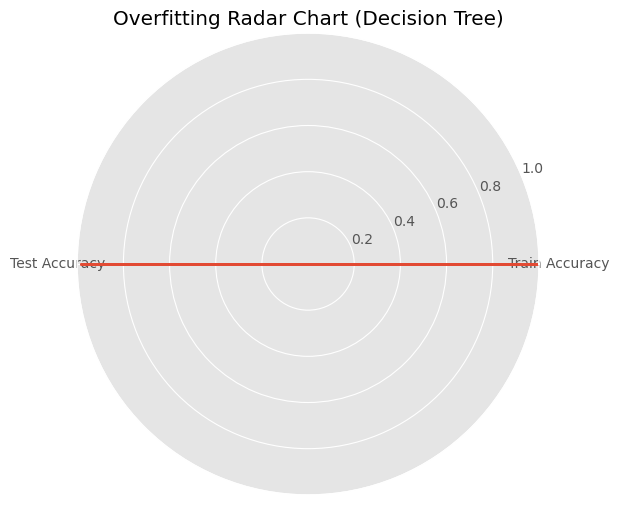

In [11]:
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)

labels = ["Train Accuracy", "Test Accuracy"]
values = [train_acc, test_acc]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.3)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Overfitting Radar Chart (Decision Tree)")
plt.show()


In [12]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0


In [13]:
print("MODEL BATTLE ARENA")
print("-----------------------")
print("Decision Tree Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy :", accuracy_score(y_test, y_pred_rf))


MODEL BATTLE ARENA
-----------------------
Decision Tree Accuracy : 0.9853658536585366
Random Forest Accuracy : 1.0


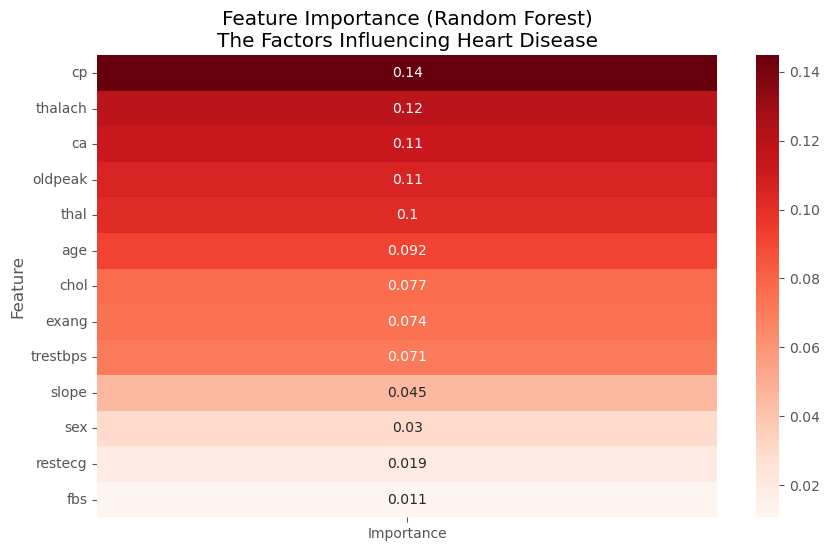

In [14]:
importances = rf.feature_importances_
imp_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
imp_df = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(imp_df.set_index("Feature"), annot=True, cmap="Reds")
plt.title("Feature Importance (Random Forest)\nThe Factors Influencing Heart Disease")
plt.show()


In [15]:
cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


Cross Validation Scores: [1.         1.         1.         1.         0.98536585]
Average CV Accuracy: 0.9970731707317073
